Tolerance (τ)   Min Point                 Min Value       Iterations
1.0e-01         [0.8973 0.8047]           0.0106          4175      
1.0e-02         [0.9889 0.9779]           0.0001          9394      
1.0e-03         [0.9989 0.9978]           0.0000          15099     
1.0e-04         [0.9999 0.9998]           0.0000          20857     
1.0e-05         [1. 1.]                   0.0000          26621     
1.0e-06         [1. 1.]                   0.0000          32385     
1.0e-07         [1. 1.]                   0.0000          38150     
1.0e-08         [1. 1.]                   0.0000          43914     
1.0e-09         [1. 1.]                   0.0000          49679     
1.0e-10         [1. 1.]                   0.0000          55444     
1.0e-11         [1. 1.]                   0.0000          61208     
1.0e-12         [1. 1.]                   0.0000          66953     
1.0e-13         [1. 1.]                   0.0000          72098     


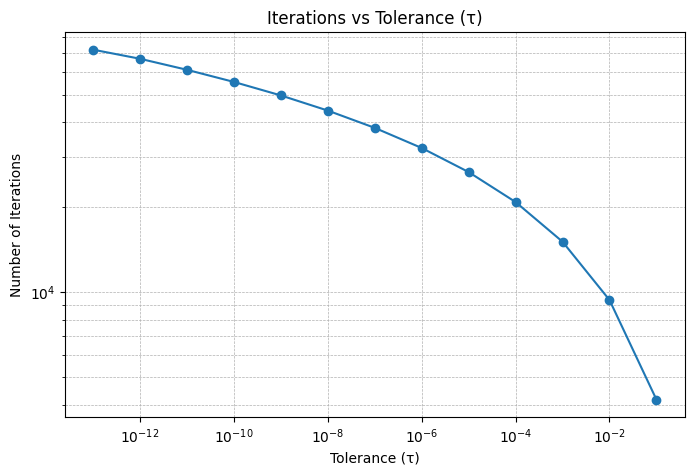

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def obj(x1, x2):
    return 100 * x2**2 + 100 * x1**4 - 200 * x1**2 * x2 + x1**2 - 2 * x1 + 1

def grad_obj(x):
    x1, x2 = x
    grad_x1 = 400 * x1**3 - 400 * x1 * x2 + 2 * x1 - 2
    grad_x2 = 200 * x2 - 200 * x1**2
    return np.array([grad_x1, grad_x2])

def optimize(start, lr, tol):
    x = np.array(start)
    steps = 0
    while np.linalg.norm(grad_obj(x)) > tol:
        x = x - lr * grad_obj(x)
        steps += 1
    return x, obj(*x), steps

x0 = [-1.5, 1.5]
lr = 0.001
results = []
tols = [10**(-p) for p in range(1, 14)]

for tol in tols:
    min_point, min_val, iters = optimize(x0, lr, tol)
    results.append((tol, min_point, min_val, iters))

print(f"{'Tolerance (τ)':<15} {'Min Point':<25} {'Min Value':<15} {'Iterations':<10}")
for tol, min_point, min_val, iters in results:
    print(f"{tol:<15.1e} {str(np.round(min_point, 4)):<25} {min_val:<15.4f} {iters:<10}")

tols = np.array(tols)
iters = np.array([res[3] for res in results])

plt.figure(figsize=(8, 5))
plt.loglog(tols, iters, marker='o')
plt.title("Iterations vs Tolerance (τ)")
plt.xlabel("Tolerance (τ)")
plt.ylabel("Number of Iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



Tolerance (τ)   Min Point                 Min Value       Iterations
1.0e-01         [-0.0001  0.0004]         0.0000          40        
1.0e-02         [-0.  0.]                 0.0000          50        
1.0e-03         [-0.  0.]                 0.0000          60        
1.0e-04         [-0.  0.]                 0.0000          71        
1.0e-05         [-0.  0.]                 0.0000          81        
1.0e-06         [-0.  0.]                 0.0000          91        
1.0e-07         [-0.  0.]                 0.0000          102       
1.0e-08         [-0.  0.]                 0.0000          112       
1.0e-09         [-0.  0.]                 0.0000          122       
1.0e-10         [-0.  0.]                 0.0000          133       
1.0e-11         [-0.  0.]                 0.0000          143       
1.0e-12         [-0.  0.]                 0.0000          153       
1.0e-13         [-0.  0.]                 0.0000          163       


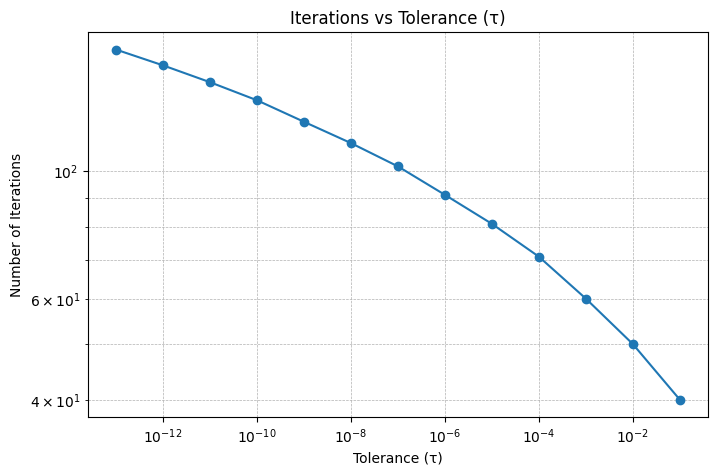

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def obj(x1, x2):
    return x1**4 + x2**4 - 20 * x1**3 - 20 * x2**3 + 100 * x1**2 + 100 * x2**2

def grad_obj(x):
    x1, x2 = x
    grad_x1 = 4 * x1**3 - 60 * x1**2 + 200 * x1
    grad_x2 = 4 * x2**3 - 60 * x2**2 + 200 * x2
    return np.array([grad_x1, grad_x2])

def grad_desc(start, lr, tol):
    x = np.array(start)
    steps = 0
    while np.linalg.norm(grad_obj(x)) > tol:
        x = x - lr * grad_obj(x)
        steps += 1
    return x, obj(*x), steps

x0 = [-1.5, 1.5]
lr = 0.001
results = []
tols = [10**(-p) for p in range(1, 14)]

for tol in tols:
    min_point, min_val, iters = grad_desc(x0, lr, tol)
    results.append((tol, min_point, min_val, iters))

print(f"{'Tolerance (τ)':<15} {'Min Point':<25} {'Min Value':<15} {'Iterations':<10}")
for tol, min_point, min_val, iters in results:
    print(f"{tol:<15.1e} {str(np.round(min_point, 4)):<25} {min_val:<15.4f} {iters:<10}")

tols = np.array(tols)
iters = np.array([res[3] for res in results])

plt.figure(figsize=(8, 5))
plt.loglog(tols, iters, marker='o')
plt.title("Iterations vs Tolerance (τ)")
plt.xlabel("Tolerance (τ)")
plt.ylabel("Number of Iterations")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



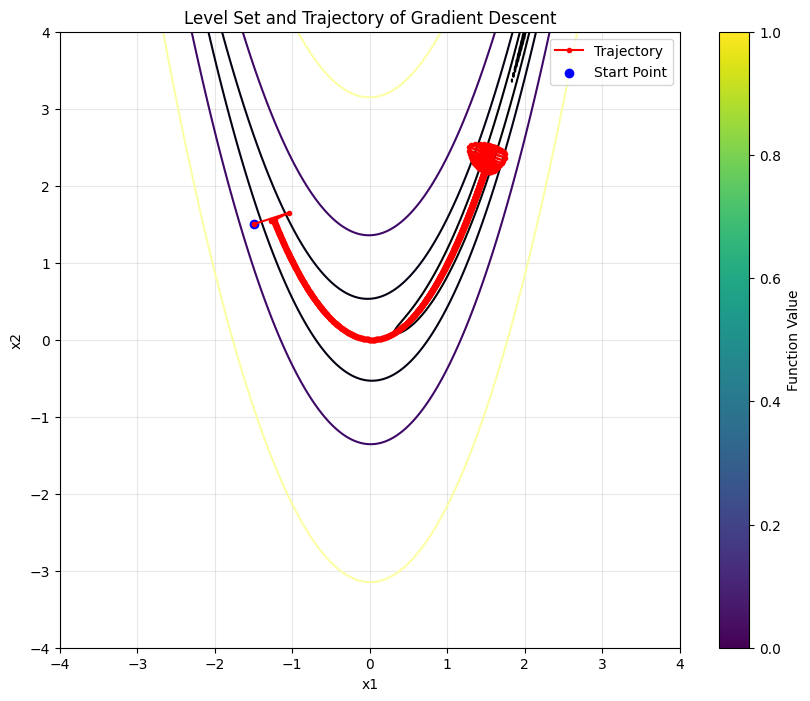

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x1_vals = np.linspace(-4, 4, 400)
x2_vals = np.linspace(-4, 4, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = (3 - X1)**2 + 100 * (X2 - X1**2)**2

def obj(x):
    x1, x2 = x
    return (3 - x1)**2 + 100 * (x2 - x1**2)**2

def grad_obj(x):
    x1, x2 = x
    grad_x1 = -2 * (3 - x1) - 400 * x1 * (x2 - x1**2)
    grad_x2 = 200 * (x2 - x1**2)
    return np.array([grad_x1, grad_x2])

# Parameters
x0 = (-1.5, 1.5)
lr = 0.001
tau = 1e-6

# Gradient Descent
traj = [x0]
x = np.array(x0, dtype=float)
for _ in range(10000):
    grad = grad_obj(x)
    x -= lr * grad
    traj.append(x.copy())
    if np.linalg.norm(grad) < tau:
        break
traj = np.array(traj)

# Plot
plt.figure(figsize=(10, 8))
plt.contour(X1, X2, Z, levels=np.logspace(-2, 3, 8), cmap='inferno')
plt.plot(traj[:, 0], traj[:, 1], color='red', marker='o', markersize=3, label="Trajectory")
plt.scatter(x0[0], x0[1], color='blue', label="Start Point")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Level Set and Trajectory of Gradient Descent")
plt.legend()
plt.colorbar(label='Function Value')
plt.grid(alpha=0.3)
plt.show()
